In [1]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from numpy import array

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## LSTM Outputs

The default output is the hidden state.

In [2]:
# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(data)
# make and show prediction
print(model.predict(data))

[[[0.1]
  [0.2]
  [0.3]]]
[[-0.04248197]]


Now have a look at returning sequences.

In [3]:
# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1, return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[[0.01934898]
  [0.05146188]
  [0.09045615]]]


Now look at returning sequences and state.

In [4]:
# define model
inputs1 = Input(shape=(3, 1))
lstm1, state_h, state_c = LSTM(1, return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=[lstm1, state_h, state_c])
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(data, '\n')
# make and show prediction
print(model.predict(data))

[[[0.1]
  [0.2]
  [0.3]]] 

[array([[-0.05681262]], dtype=float32), array([[-0.05681262]], dtype=float32), array([[-0.10872175]], dtype=float32)]


In [5]:
# define model
inputs1 = Input(shape=(3, 1))
lstm1, state_h, state_c = LSTM(1, return_sequences=True, return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=[lstm1, state_h, state_c])
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[array([[[0.00440865],
        [0.01240896],
        [0.0233255 ]]], dtype=float32), array([[0.0233255]], dtype=float32), array([[0.04238376]], dtype=float32)]


## One-One, One-Many and Many-Many

Now let's learn about the TimeDistributed layer as per [here](https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/).

In [6]:
length = 5
seq = array([i/float(length) for i in range(length)])
print(seq)

[0.  0.2 0.4 0.6 0.8]


### One-One learning 

Our input = 5 samples of 1 timestep having 1 feature.

In [7]:
X = seq.reshape(5, 1, 1)
y = seq.reshape(5, 1)
print(X.shape, X,'\n', y.shape, y)

(5, 1, 1) [[[0. ]]

 [[0.2]]

 [[0.4]]

 [[0.6]]

 [[0.8]]] 
 (5, 1) [[0. ]
 [0.2]
 [0.4]
 [0.6]
 [0.8]]


In [8]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# define LSTM configuration
n_neurons = length
n_batch = length
n_epoch = 1000
# create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
# train LSTM
model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=2)
# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result:
	print('%.1f' % value)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 - 0s - loss: 0.2711
Epoch 2/1000
 - 0s - loss: 0.2694
Epoch 3/1000
 - 0s - loss: 0.2677
Epoch 4/1000
 - 0s - loss: 0.2660
Epoch 5/1000
 - 0s - loss: 0.2643
Epoch 6/1000
 - 0s - loss: 0.2626
Epoch 7/1000
 - 0s - loss: 0.2610
Epoch 8/1000
 - 0s - loss: 0.2593
Epoch 9/1000
 - 0s - loss: 0.2577
Epoch 10/1000
 - 0s - loss: 0.2561
Epoch 11/1000
 - 0s - loss: 0.2545
Epoch 12/1000
 - 0s - loss: 0.2529
Epoch 13/1000
 - 0s - loss: 0.2513
Epoch 14/1000
 - 0s - loss: 0.2497
Epoch 15/1000
 - 0s - loss: 0.2481
Epoch 16/1000
 - 0s

Epoch 215/1000
 - 0s - loss: 0.0723
Epoch 216/1000
 - 0s - loss: 0.0719
Epoch 217/1000
 - 0s - loss: 0.0716
Epoch 218/1000
 - 0s - loss: 0.0712
Epoch 219/1000
 - 0s - loss: 0.0709
Epoch 220/1000
 - 0s - loss: 0.0706
Epoch 221/1000
 - 0s - loss: 0.0702
Epoch 222/1000
 - 0s - loss: 0.0699
Epoch 223/1000
 - 0s - loss: 0.0696
Epoch 224/1000
 - 0s - loss: 0.0692
Epoch 225/1000
 - 0s - loss: 0.0689
Epoch 226/1000
 - 0s - loss: 0.0686
Epoch 227/1000
 - 0s - loss: 0.0683
Epoch 228/1000
 - 0s - loss: 0.0680
Epoch 229/1000
 - 0s - loss: 0.0677
Epoch 230/1000
 - 0s - loss: 0.0674
Epoch 231/1000
 - 0s - loss: 0.0671
Epoch 232/1000
 - 0s - loss: 0.0668
Epoch 233/1000
 - 0s - loss: 0.0665
Epoch 234/1000
 - 0s - loss: 0.0662
Epoch 235/1000
 - 0s - loss: 0.0660
Epoch 236/1000
 - 0s - loss: 0.0657
Epoch 237/1000
 - 0s - loss: 0.0654
Epoch 238/1000
 - 0s - loss: 0.0651
Epoch 239/1000
 - 0s - loss: 0.0649
Epoch 240/1000
 - 0s - loss: 0.0646
Epoch 241/1000
 - 0s - loss: 0.0644
Epoch 242/1000
 - 0s - loss:

Epoch 443/1000
 - 0s - loss: 0.0365
Epoch 444/1000
 - 0s - loss: 0.0364
Epoch 445/1000
 - 0s - loss: 0.0363
Epoch 446/1000
 - 0s - loss: 0.0362
Epoch 447/1000
 - 0s - loss: 0.0360
Epoch 448/1000
 - 0s - loss: 0.0359
Epoch 449/1000
 - 0s - loss: 0.0358
Epoch 450/1000
 - 0s - loss: 0.0357
Epoch 451/1000
 - 0s - loss: 0.0355
Epoch 452/1000
 - 0s - loss: 0.0354
Epoch 453/1000
 - 0s - loss: 0.0353
Epoch 454/1000
 - 0s - loss: 0.0352
Epoch 455/1000
 - 0s - loss: 0.0351
Epoch 456/1000
 - 0s - loss: 0.0349
Epoch 457/1000
 - 0s - loss: 0.0348
Epoch 458/1000
 - 0s - loss: 0.0347
Epoch 459/1000
 - 0s - loss: 0.0346
Epoch 460/1000
 - 0s - loss: 0.0344
Epoch 461/1000
 - 0s - loss: 0.0343
Epoch 462/1000
 - 0s - loss: 0.0342
Epoch 463/1000
 - 0s - loss: 0.0341
Epoch 464/1000
 - 0s - loss: 0.0339
Epoch 465/1000
 - 0s - loss: 0.0338
Epoch 466/1000
 - 0s - loss: 0.0337
Epoch 467/1000
 - 0s - loss: 0.0336
Epoch 468/1000
 - 0s - loss: 0.0334
Epoch 469/1000
 - 0s - loss: 0.0333
Epoch 470/1000
 - 0s - loss:

Epoch 671/1000
 - 0s - loss: 0.0102
Epoch 672/1000
 - 0s - loss: 0.0101
Epoch 673/1000
 - 0s - loss: 0.0100
Epoch 674/1000
 - 0s - loss: 0.0100
Epoch 675/1000
 - 0s - loss: 0.0099
Epoch 676/1000
 - 0s - loss: 0.0098
Epoch 677/1000
 - 0s - loss: 0.0097
Epoch 678/1000
 - 0s - loss: 0.0096
Epoch 679/1000
 - 0s - loss: 0.0095
Epoch 680/1000
 - 0s - loss: 0.0094
Epoch 681/1000
 - 0s - loss: 0.0094
Epoch 682/1000
 - 0s - loss: 0.0093
Epoch 683/1000
 - 0s - loss: 0.0092
Epoch 684/1000
 - 0s - loss: 0.0091
Epoch 685/1000
 - 0s - loss: 0.0090
Epoch 686/1000
 - 0s - loss: 0.0089
Epoch 687/1000
 - 0s - loss: 0.0089
Epoch 688/1000
 - 0s - loss: 0.0088
Epoch 689/1000
 - 0s - loss: 0.0087
Epoch 690/1000
 - 0s - loss: 0.0086
Epoch 691/1000
 - 0s - loss: 0.0085
Epoch 692/1000
 - 0s - loss: 0.0085
Epoch 693/1000
 - 0s - loss: 0.0084
Epoch 694/1000
 - 0s - loss: 0.0083
Epoch 695/1000
 - 0s - loss: 0.0082
Epoch 696/1000
 - 0s - loss: 0.0081
Epoch 697/1000
 - 0s - loss: 0.0081
Epoch 698/1000
 - 0s - loss:

Epoch 896/1000
 - 0s - loss: 6.5888e-04
Epoch 897/1000
 - 0s - loss: 6.4975e-04
Epoch 898/1000
 - 0s - loss: 6.4076e-04
Epoch 899/1000
 - 0s - loss: 6.3191e-04
Epoch 900/1000
 - 0s - loss: 6.2320e-04
Epoch 901/1000
 - 0s - loss: 6.1463e-04
Epoch 902/1000
 - 0s - loss: 6.0618e-04
Epoch 903/1000
 - 0s - loss: 5.9788e-04
Epoch 904/1000
 - 0s - loss: 5.8970e-04
Epoch 905/1000
 - 0s - loss: 5.8165e-04
Epoch 906/1000
 - 0s - loss: 5.7373e-04
Epoch 907/1000
 - 0s - loss: 5.6593e-04
Epoch 908/1000
 - 0s - loss: 5.5826e-04
Epoch 909/1000
 - 0s - loss: 5.5071e-04
Epoch 910/1000
 - 0s - loss: 5.4328e-04
Epoch 911/1000
 - 0s - loss: 5.3598e-04
Epoch 912/1000
 - 0s - loss: 5.2879e-04
Epoch 913/1000
 - 0s - loss: 5.2171e-04
Epoch 914/1000
 - 0s - loss: 5.1475e-04
Epoch 915/1000
 - 0s - loss: 5.0790e-04
Epoch 916/1000
 - 0s - loss: 5.0116e-04
Epoch 917/1000
 - 0s - loss: 4.9454e-04
Epoch 918/1000
 - 0s - loss: 4.8802e-04
Epoch 919/1000
 - 0s - loss: 4.8161e-04
Epoch 920/1000
 - 0s - loss: 4.7530e-04


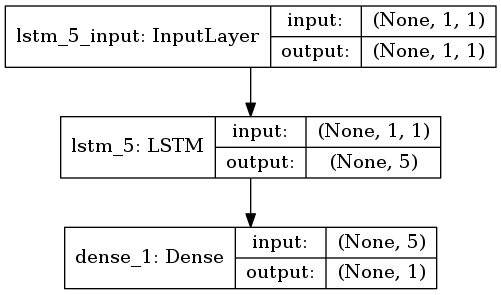

In [9]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image
Image(model_to_dot(model, show_shapes=True).create_png(prog='dot'))

### Many to one learning 

Our input is one sample of 5 time steps, each time step having one feature.

In [10]:
X = seq.reshape(1, 5, 1)
y = seq.reshape(1, 5)
print(X.shape, X,'\n', y.shape, y)

(1, 5, 1) [[[0. ]
  [0.2]
  [0.4]
  [0.6]
  [0.8]]] 
 (1, 5) [[0.  0.2 0.4 0.6 0.8]]


In [11]:
# create LSTM
model = Sequential()
model.add(LSTM(5, input_shape=(5, 1)))
model.add(Dense(length))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________
None


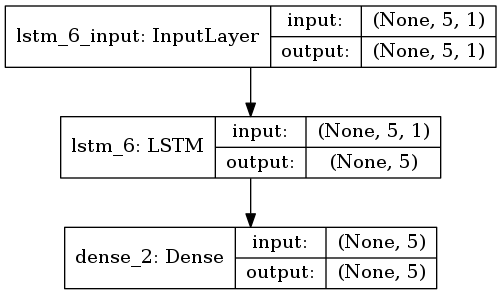

In [12]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image
Image(model_to_dot(model, show_shapes=True).create_png(prog='dot'))

In [13]:
# train LSTM
model.fit(X, y, epochs=500, batch_size=1, verbose=2)

Epoch 1/500
 - 0s - loss: 0.2896
Epoch 2/500
 - 0s - loss: 0.2869
Epoch 3/500
 - 0s - loss: 0.2842
Epoch 4/500
 - 0s - loss: 0.2816
Epoch 5/500
 - 0s - loss: 0.2790
Epoch 6/500
 - 0s - loss: 0.2764
Epoch 7/500
 - 0s - loss: 0.2739
Epoch 8/500
 - 0s - loss: 0.2714
Epoch 9/500
 - 0s - loss: 0.2689
Epoch 10/500
 - 0s - loss: 0.2664
Epoch 11/500
 - 0s - loss: 0.2640
Epoch 12/500
 - 0s - loss: 0.2616
Epoch 13/500
 - 0s - loss: 0.2592
Epoch 14/500
 - 0s - loss: 0.2569
Epoch 15/500
 - 0s - loss: 0.2546
Epoch 16/500
 - 0s - loss: 0.2523
Epoch 17/500
 - 0s - loss: 0.2500
Epoch 18/500
 - 0s - loss: 0.2478
Epoch 19/500
 - 0s - loss: 0.2456
Epoch 20/500
 - 0s - loss: 0.2434
Epoch 21/500
 - 0s - loss: 0.2413
Epoch 22/500
 - 0s - loss: 0.2391
Epoch 23/500
 - 0s - loss: 0.2370
Epoch 24/500
 - 0s - loss: 0.2350
Epoch 25/500
 - 0s - loss: 0.2329
Epoch 26/500
 - 0s - loss: 0.2309
Epoch 27/500
 - 0s - loss: 0.2289
Epoch 28/500
 - 0s - loss: 0.2270
Epoch 29/500
 - 0s - loss: 0.2250
Epoch 30/500
 - 0s - lo

 - 0s - loss: 0.0305
Epoch 239/500
 - 0s - loss: 0.0301
Epoch 240/500
 - 0s - loss: 0.0296
Epoch 241/500
 - 0s - loss: 0.0292
Epoch 242/500
 - 0s - loss: 0.0287
Epoch 243/500
 - 0s - loss: 0.0283
Epoch 244/500
 - 0s - loss: 0.0279
Epoch 245/500
 - 0s - loss: 0.0274
Epoch 246/500
 - 0s - loss: 0.0270
Epoch 247/500
 - 0s - loss: 0.0266
Epoch 248/500
 - 0s - loss: 0.0262
Epoch 249/500
 - 0s - loss: 0.0258
Epoch 250/500
 - 0s - loss: 0.0253
Epoch 251/500
 - 0s - loss: 0.0249
Epoch 252/500
 - 0s - loss: 0.0245
Epoch 253/500
 - 0s - loss: 0.0241
Epoch 254/500
 - 0s - loss: 0.0237
Epoch 255/500
 - 0s - loss: 0.0233
Epoch 256/500
 - 0s - loss: 0.0229
Epoch 257/500
 - 0s - loss: 0.0225
Epoch 258/500
 - 0s - loss: 0.0221
Epoch 259/500
 - 0s - loss: 0.0217
Epoch 260/500
 - 0s - loss: 0.0214
Epoch 261/500
 - 0s - loss: 0.0210
Epoch 262/500
 - 0s - loss: 0.0206
Epoch 263/500
 - 0s - loss: 0.0202
Epoch 264/500
 - 0s - loss: 0.0198
Epoch 265/500
 - 0s - loss: 0.0195
Epoch 266/500
 - 0s - loss: 0.0191

Epoch 461/500
 - 0s - loss: 3.1094e-07
Epoch 462/500
 - 0s - loss: 2.7969e-07
Epoch 463/500
 - 0s - loss: 2.5139e-07
Epoch 464/500
 - 0s - loss: 2.2581e-07
Epoch 465/500
 - 0s - loss: 2.0269e-07
Epoch 466/500
 - 0s - loss: 1.8181e-07
Epoch 467/500
 - 0s - loss: 1.6297e-07
Epoch 468/500
 - 0s - loss: 1.4595e-07
Epoch 469/500
 - 0s - loss: 1.3058e-07
Epoch 470/500
 - 0s - loss: 1.1676e-07
Epoch 471/500
 - 0s - loss: 1.0434e-07
Epoch 472/500
 - 0s - loss: 9.3165e-08
Epoch 473/500
 - 0s - loss: 8.3106e-08
Epoch 474/500
 - 0s - loss: 7.4063e-08
Epoch 475/500
 - 0s - loss: 6.5966e-08
Epoch 476/500
 - 0s - loss: 5.8682e-08
Epoch 477/500
 - 0s - loss: 5.2167e-08
Epoch 478/500
 - 0s - loss: 4.6358e-08
Epoch 479/500
 - 0s - loss: 4.1117e-08
Epoch 480/500
 - 0s - loss: 3.6444e-08
Epoch 481/500
 - 0s - loss: 3.2285e-08
Epoch 482/500
 - 0s - loss: 2.8554e-08
Epoch 483/500
 - 0s - loss: 2.5237e-08
Epoch 484/500
 - 0s - loss: 2.2272e-08
Epoch 485/500
 - 0s - loss: 1.9643e-08
Epoch 486/500
 - 0s - los

In [14]:
# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result[0,:]:
	print('%.1f' % value)

-0.0
0.2
0.4
0.6
0.8


### Many to many

There are two key points to remember when using the TimeDistributed wrapper layer:

*    The input must be (at least) 3D. This often means that you will need to configure your last LSTM layer prior to your TimeDistributed wrapped Dense layer to return sequences (e.g. set the “return_sequences” argument to “True”).
*    The output will be 3D. This means that if your TimeDistributed wrapped Dense layer is your output layer and you are predicting a sequence, you will need to resize your y array into a 3D vector.


In [15]:
data

array([[[0.1],
        [0.2],
        [0.3]]])

In [16]:
data[0]

array([[0.1],
       [0.2],
       [0.3]])

In [17]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import LSTM
# prepare sequence
length = 5
seq = array([i/float(length) for i in range(length)])
X = seq.reshape(1, length, 1)
y = seq.reshape(1, length, 1)
# define LSTM configuration
n_neurons = length
n_batch = 1
n_epoch = 1000
# create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(length, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

# train LSTM
model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=2)
# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result[0,:,0]:
	print('%.1f' % value)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 1)              6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 - 0s - loss: 0.2733
Epoch 2/1000
 - 0s - loss: 0.2705
Epoch 3/1000
 - 0s - loss: 0.2677
Epoch 4/1000
 - 0s - loss: 0.2650
Epoch 5/1000
 - 0s - loss: 0.2624
Epoch 6/1000
 - 0s - loss: 0.2597
Epoch 7/1000
 - 0s - loss: 0.2570
Epoch 8/1000
 - 0s - loss: 0.2543
Epoch 9/1000
 - 0s - loss: 0.2517
Epoch 10/1000
 - 0s - loss: 0.2491
Epoch 11/1000
 - 0s - loss: 0.2465
Epoch 12/1000
 - 0s - loss: 0.2439
Epoch 13/1000
 - 0s - loss: 0.2413
Epoch 14/1000
 - 0s - loss: 0.2387
Epoch 15/1000
 - 0s - loss: 0.2362
Epoch 16/1000
 - 0s

Epoch 215/1000
 - 0s - loss: 0.0087
Epoch 216/1000
 - 0s - loss: 0.0086
Epoch 217/1000
 - 0s - loss: 0.0086
Epoch 218/1000
 - 0s - loss: 0.0086
Epoch 219/1000
 - 0s - loss: 0.0085
Epoch 220/1000
 - 0s - loss: 0.0085
Epoch 221/1000
 - 0s - loss: 0.0085
Epoch 222/1000
 - 0s - loss: 0.0084
Epoch 223/1000
 - 0s - loss: 0.0084
Epoch 224/1000
 - 0s - loss: 0.0083
Epoch 225/1000
 - 0s - loss: 0.0083
Epoch 226/1000
 - 0s - loss: 0.0083
Epoch 227/1000
 - 0s - loss: 0.0082
Epoch 228/1000
 - 0s - loss: 0.0082
Epoch 229/1000
 - 0s - loss: 0.0082
Epoch 230/1000
 - 0s - loss: 0.0081
Epoch 231/1000
 - 0s - loss: 0.0081
Epoch 232/1000
 - 0s - loss: 0.0081
Epoch 233/1000
 - 0s - loss: 0.0080
Epoch 234/1000
 - 0s - loss: 0.0080
Epoch 235/1000
 - 0s - loss: 0.0080
Epoch 236/1000
 - 0s - loss: 0.0079
Epoch 237/1000
 - 0s - loss: 0.0079
Epoch 238/1000
 - 0s - loss: 0.0079
Epoch 239/1000
 - 0s - loss: 0.0078
Epoch 240/1000
 - 0s - loss: 0.0078
Epoch 241/1000
 - 0s - loss: 0.0078
Epoch 242/1000
 - 0s - loss:

Epoch 443/1000
 - 0s - loss: 0.0035
Epoch 444/1000
 - 0s - loss: 0.0035
Epoch 445/1000
 - 0s - loss: 0.0035
Epoch 446/1000
 - 0s - loss: 0.0035
Epoch 447/1000
 - 0s - loss: 0.0035
Epoch 448/1000
 - 0s - loss: 0.0035
Epoch 449/1000
 - 0s - loss: 0.0035
Epoch 450/1000
 - 0s - loss: 0.0035
Epoch 451/1000
 - 0s - loss: 0.0035
Epoch 452/1000
 - 0s - loss: 0.0035
Epoch 453/1000
 - 0s - loss: 0.0034
Epoch 454/1000
 - 0s - loss: 0.0034
Epoch 455/1000
 - 0s - loss: 0.0034
Epoch 456/1000
 - 0s - loss: 0.0034
Epoch 457/1000
 - 0s - loss: 0.0034
Epoch 458/1000
 - 0s - loss: 0.0034
Epoch 459/1000
 - 0s - loss: 0.0034
Epoch 460/1000
 - 0s - loss: 0.0034
Epoch 461/1000
 - 0s - loss: 0.0034
Epoch 462/1000
 - 0s - loss: 0.0034
Epoch 463/1000
 - 0s - loss: 0.0034
Epoch 464/1000
 - 0s - loss: 0.0033
Epoch 465/1000
 - 0s - loss: 0.0033
Epoch 466/1000
 - 0s - loss: 0.0033
Epoch 467/1000
 - 0s - loss: 0.0033
Epoch 468/1000
 - 0s - loss: 0.0033
Epoch 469/1000
 - 0s - loss: 0.0033
Epoch 470/1000
 - 0s - loss:

Epoch 671/1000
 - 0s - loss: 0.0022
Epoch 672/1000
 - 0s - loss: 0.0022
Epoch 673/1000
 - 0s - loss: 0.0022
Epoch 674/1000
 - 0s - loss: 0.0022
Epoch 675/1000
 - 0s - loss: 0.0022
Epoch 676/1000
 - 0s - loss: 0.0022
Epoch 677/1000
 - 0s - loss: 0.0022
Epoch 678/1000
 - 0s - loss: 0.0022
Epoch 679/1000
 - 0s - loss: 0.0022
Epoch 680/1000
 - 0s - loss: 0.0022
Epoch 681/1000
 - 0s - loss: 0.0021
Epoch 682/1000
 - 0s - loss: 0.0021
Epoch 683/1000
 - 0s - loss: 0.0021
Epoch 684/1000
 - 0s - loss: 0.0021
Epoch 685/1000
 - 0s - loss: 0.0021
Epoch 686/1000
 - 0s - loss: 0.0021
Epoch 687/1000
 - 0s - loss: 0.0021
Epoch 688/1000
 - 0s - loss: 0.0021
Epoch 689/1000
 - 0s - loss: 0.0021
Epoch 690/1000
 - 0s - loss: 0.0021
Epoch 691/1000
 - 0s - loss: 0.0021
Epoch 692/1000
 - 0s - loss: 0.0021
Epoch 693/1000
 - 0s - loss: 0.0021
Epoch 694/1000
 - 0s - loss: 0.0021
Epoch 695/1000
 - 0s - loss: 0.0021
Epoch 696/1000
 - 0s - loss: 0.0021
Epoch 697/1000
 - 0s - loss: 0.0021
Epoch 698/1000
 - 0s - loss:

Epoch 899/1000
 - 0s - loss: 0.0014
Epoch 900/1000
 - 0s - loss: 0.0014
Epoch 901/1000
 - 0s - loss: 0.0014
Epoch 902/1000
 - 0s - loss: 0.0014
Epoch 903/1000
 - 0s - loss: 0.0014
Epoch 904/1000
 - 0s - loss: 0.0014
Epoch 905/1000
 - 0s - loss: 0.0014
Epoch 906/1000
 - 0s - loss: 0.0014
Epoch 907/1000
 - 0s - loss: 0.0014
Epoch 908/1000
 - 0s - loss: 0.0014
Epoch 909/1000
 - 0s - loss: 0.0014
Epoch 910/1000
 - 0s - loss: 0.0014
Epoch 911/1000
 - 0s - loss: 0.0014
Epoch 912/1000
 - 0s - loss: 0.0014
Epoch 913/1000
 - 0s - loss: 0.0014
Epoch 914/1000
 - 0s - loss: 0.0014
Epoch 915/1000
 - 0s - loss: 0.0014
Epoch 916/1000
 - 0s - loss: 0.0014
Epoch 917/1000
 - 0s - loss: 0.0014
Epoch 918/1000
 - 0s - loss: 0.0014
Epoch 919/1000
 - 0s - loss: 0.0014
Epoch 920/1000
 - 0s - loss: 0.0014
Epoch 921/1000
 - 0s - loss: 0.0014
Epoch 922/1000
 - 0s - loss: 0.0014
Epoch 923/1000
 - 0s - loss: 0.0014
Epoch 924/1000
 - 0s - loss: 0.0014
Epoch 925/1000
 - 0s - loss: 0.0014
Epoch 926/1000
 - 0s - loss:

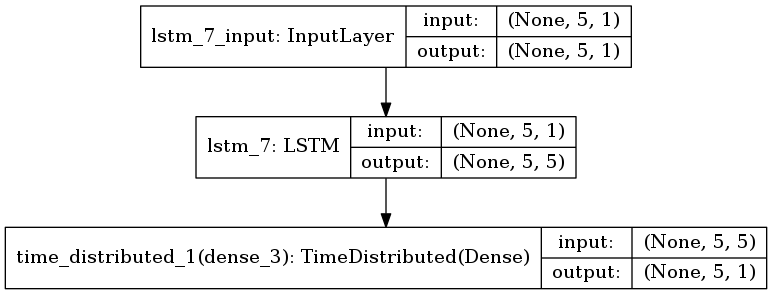

In [18]:
Image(model_to_dot(model, show_shapes=True).create_png(prog='dot'))

So this model:
* Has as input samples that have 5 timesteps, each with one feature.
* Then for each sample applies an LSTM that has 5 dimensions - the output being 5 timesteps, each with 5 features.
* Then applies a dense layer to each timestep, to reduce each timestep back down to one feature.